<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2019-2020/Examens/20200618_2o_Parcial_Programaci%C3%B3n_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2º parcial (programación) 18/06/2020**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen. 
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*) 
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examan) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/FQ9X). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero no comunicaros entre vosotros/as.
*   Es obligatorio conectarse a la sesión de MS Teams durante la realización del examen. [Link](http://cern.ch/go/6mhN)
*   Podéis utilizar el chat privado para hacer consultas durante el examen y si hay una duda general que afecte a todos, se puede comentar en voz alta utilizando esta herramienta.
*   **NOTA:** Se llamará aleatoriamente a ciertos alumnos para que nos expliquen cómo han hecho el examen, antes de publicar las notas.

<hr>

## **EXAMEN**

In [1]:
# Ejecuta esta parte de código para importar las librerías necesarias
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## <font color='green'>**> Ejercicio #1 [3.5 puntos]**</font>

Queremos determinar el área comprendida en una superficie delimitada por dos parábolas usando el método Monte Carlo. Compararemos con el cálculo analítico y estimaremos el error cometido como función del número de puntos considerados en el cálculo.

**1.1 [1.25 puntos]:** Representa gráficamente las parábolas $y_1=1 - x^2$ y $y_2=x^2$, en el intervalo de x = [-1, 1]. Determina analíticamente el área comprendida entre ellas (intersección), asigna el valor a una variable y muestra el valor de la integral analítica por pantalla (con 3 dígitos). Puedes usar el text box para mostrar el desarrollo de la integral analítica.


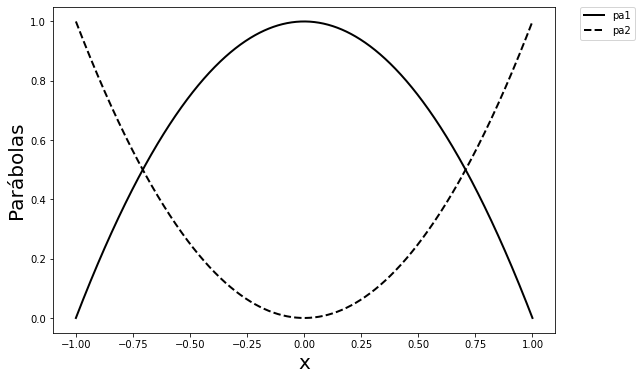

Integral analítica pa1 = 1.179
Integral analítica pa2 = 0.236
Integral analítica intersección = 0.943


In [2]:
# Ejercicio 1.1

def pa1(x):
  return 1 - x**2

def pa2(x):
  return x**2

# Representación gráfica 

Np = 1000
x = np.linspace(-1,1,Np)

plt.figure(figsize=(9,6))
plt.plot(x,pa1(x),'k-',lw=2,label="pa1")
plt.plot(x,pa2(x),'k--',lw=2,label="pa2")
plt.ylabel("Parábolas", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0.)
plt.show()

# Integral 

def i_pa1(x):
  return x-(1./3.)*x**3

def i_pa2(x):
  return (1./3.)*x**3

xinf = -1.*np.sqrt(1/2)
xsup = np.sqrt(1/2)

I1 = i_pa1(xsup) - i_pa1(xinf)
I2 = i_pa2(xsup) - i_pa2(xinf)
Iinter = I1-I2

print("Integral analítica pa1 = {:.3f}".format(I1))
print("Integral analítica pa2 = {:.3f}".format(I2))
print("Integral analítica intersección = {:.3f}".format(Iinter))

*Ejercicio 1.1: integral analítica. Desarrollo*

Primero calculamos los puntos en x donde cortan las dos parábolas: $y_1 = y_2$. Esto nos dan los puntos $x_{inf} = -\sqrt\frac{1}{2}$ y $x_{sup} = +\sqrt\frac{1}{2}$. Estos serán nuestros límites de integración.

La integral de la primera parábola es:

$$
I_1 = \int_{x_{inf}}^{x_{sup}} y_1 = \int_{x_{inf}}^{x_{sup}} (1-x^2) dx = | x-x^3/3 |_ {x_{inf}}^{x_{sup}} = 1.179
$$

La integral de la segunda parábola es:

$$
I_2 = \int_{x_{inf}}^{x_{sup}} y_2 = \int_{x_{inf}}^{x_{sup}} x^2 dx = | x^3/3 |_ {x_{inf}}^{x_{sup}} = 0.236
$$

La integral de la intersección es:

$$
I_1 - I_2 = 0.943
$$


**1.2 [1.25 puntos]:** Determina el área comprendida entre las dos parábolas por el método Monte Carlo usando N=1000 puntos. Representa gráficamente las parábolas, los puntos aceptados en verde, los puntos rechazados en rojo, y muestra por pantalla en valor de la integral MC y el de la integral analítica (las dos con 3 dígitos). 


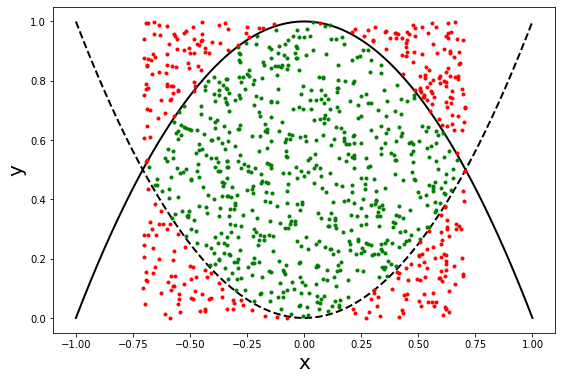

MC integration : 0.922
Integral analítica intersección = 0.943


In [6]:
# Ejercicio 1.2

y_min = pa2(0.)
y_max = pa1(0.)

N = 1000

x_tries = np.random.uniform(-np.sqrt(1/2),np.sqrt(1/2),N)  
y_tries = np.random.uniform(y_min,y_max,N)

x_valid1 = x_tries[y_tries <= pa1(x_tries)]
y_valid1 = y_tries[y_tries <= pa1(x_tries)]

x_valid = x_valid1[y_valid1 >= pa2(x_valid1)]
y_valid = y_valid1[y_valid1 >= pa2(x_valid1)]

x_novalid1 = x_tries[y_tries > pa1(x_tries)]
y_novalid1 = y_tries[y_tries > pa1(x_tries)]

x_novalid2 = x_tries[y_tries < pa2(x_tries)]
y_novalid2 = y_tries[y_tries < pa2(x_tries)]

plt.figure(figsize=(9, 6))
plt.plot(x,pa1(x),'k-',lw=2,label="pa1")
plt.plot(x,pa2(x),'k--',lw=2,label="pa2")
plt.plot(x_valid,y_valid,'g.')
plt.plot(x_novalid1,y_novalid1,'r.')
plt.plot(x_novalid2,y_novalid2,'r.')
plt.ylabel("y", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.show()

a_rec=2.*np.sqrt(1/2)*(pa1(0.)-pa2(0.))
IMC = a_rec*len(x_valid)/N 
print("MC integration : {:.3f}".format(IMC))
print("Integral analítica intersección = {:.3f}".format(Iinter))

**1.3 [1 punto]:** Determina el error relativo en % cometido en el cálculo de la integral con el método Monte Carlo como función del número de puntos que se usan. Varía N de 100 a 10000 (en pasos de 100) y haz una gráfica del error relativo en % en función de N. El error relativo es:

$$
Error (\%) = 100. | \frac{I_{MC}-I_{analítica}}{I_{analítica}} | 
$$

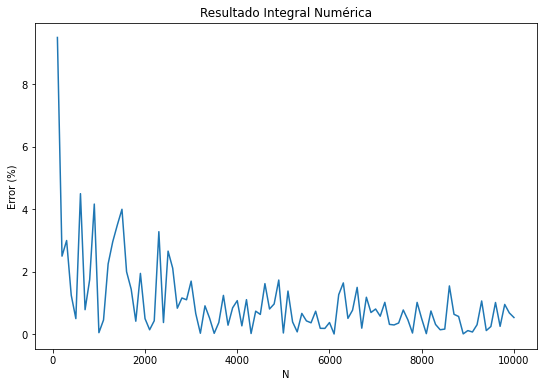

In [7]:
# Ejercicio 1.3

Inte = []
P = []
Xp1 = []

for N in range (100,10000+100,100):

  x_tries = np.random.uniform(-np.sqrt(1/2),np.sqrt(1/2),N)
  y_tries = np.random.uniform(y_min,y_max,N)

  x_valid1 = x_tries[y_tries <= pa1(x_tries)]
  y_valid1 = y_tries[y_tries <= pa1(x_tries)]

  x_valid = x_valid1[y_valid1 >= pa2(x_valid1)]
  y_valid = y_valid1[y_valid1 >= pa2(x_valid1)]

  Xp1.append(N)
  Inte.append(a_rec*len(x_valid)/N)
  P.append(100.*np.abs( ( a_rec*len(x_valid)/N - Iinter )/(Iinter)))
  #print(100.*np.abs( ( a_rec*len(x_valid)/N - Iinter )/(Iinter)))
  #print(len(x_valid))
  #print(N)
  #print(a_rec)
  #print(Iinter)

plt.figure(figsize=(9, 6))
plt.plot(Xp1,P)
plt.title("Resultado Integral Numérica")
plt.xlabel("N")
#plt.yscale('log')
plt.ylabel("Error (%)")
plt.show()

## <font color='green'>**> Ejercicio #2 [3 puntos]**</font>

En el primer parcial de la asignatura teníamos que resolver un problema de cálculo de probabilidad de forma analítica. En este ejercicio veremos cómo se puede resolver de forma algorítmica. 

Recordemos primero el enunciado del problema: tenemos una baraja de 52 cartas (4 palos de 13 cartas). Las barajamos y separamos en dos pilas de 26 cartas. Cogemos la primera carta de una de las pilas y vemos que es un rey. Metemos la carta en la otra pila y la volvemos a barajar. Tomamos la primera carta de esta pila. Cuál es la probabilidad de que esta segunda carta sea un rey? El valor de la probabilidad frecuentista vimos que se acerca al valor de $P \sim 0.0937$. 

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

Implementaremos un algoritmo que simula $N=50000$ realizaciones de este experimento y cuenta cuántas veces ocurre que la segunda carta sea un rey habiendo salido un rey de la primera pila que se ha puesto en la segunda pila. 

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de arrays. Puedes generar un array de 52 números enteros que se correspondan a cada carta de la baraja. Para barajar un array puedes usar el método ``random.shuffle(a)`` y para dividir un array en subarrays puedes usar la sintaxis ``a[0:10]``.

Os ponemos unos ejemplos en código:

In [8]:
# Ejemplo de barajar una lista:

a = [1,2,3,4,5,6]
print("La lista antes de barajar es:",a)
random.shuffle(a)
print("La lista después de barajar es:",a)

# Ejemplo dividir una lista en dos:

print("La primera mitad de la lista es",a[0:3],"y la segunda mitad es",a[3:7])
b = a[0:3]
c = a[3:7]
print("La primera mitad de la lista es",b,"y la segunda mitad es",c)

La lista antes de barajar es: [1, 2, 3, 4, 5, 6]
La lista después de barajar es: [4, 2, 6, 5, 1, 3]
La primera mitad de la lista es [4, 2, 6] y la segunda mitad es [5, 1, 3]
La primera mitad de la lista es [4, 2, 6] y la segunda mitad es [5, 1, 3]


**2.1 [3 puntos]:** Genera una gráfica mostrando cómo evoluciona la probabilidad P a medida que $N$ aumenta (de 1 a 50000). Puedes ver mejor esta gráfica si haces que el eje x esté en escala logarítmica. Dibuja una recta a $P = 0.0937$, imprime en pantalla la probabilidad correspondiente después de haber realizado las 50000 realizaciones (con 3 dígitos) y muestra también el error relativo en % cometido en el cálculo, comparando con el valor de $ P = 0.0937$ (con 3 dígitos).

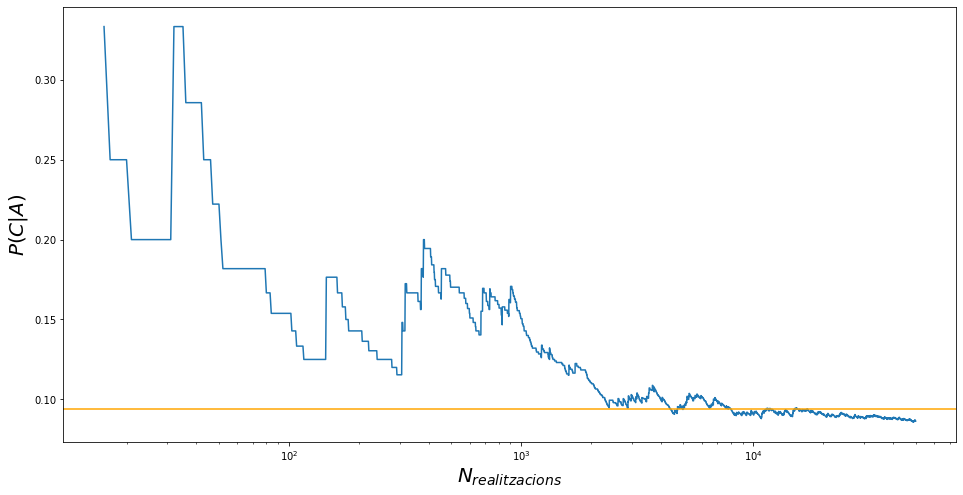

La probabilidad después de 50000 realizaciones es 0.086
El error relativo es: 7.756 %


In [12]:
# Ejercicio 2.1

a = []
N = []

N_t = 0
N_A = 0
N_C = 0
N_B = 0

for i in np.arange(1,50e3):
  N_t+=1
  card_list = np.arange(1,53)
  random.shuffle(card_list) #shuffle method

  y1 = list(card_list[0:26])
  y2 = list(card_list[26:52])

  if (y1[0] % 13 == 0):
    y2.append(y1[0])
    random.shuffle(y2)
    N_A+=1
    if (y2[0] % 13 == 0):
      N_C+=1

  if (N_C != 0):
    N.append(N_t)
    a.append(N_C/N_A)

plt.figure(figsize=(16, 8))
plt.plot(N,a)
plt.axhline(y=0.0937, color='orange')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel("$N_{realitzacions}$", fontsize=20)
plt.ylabel("$P(C|A)$", fontsize=20)
plt.show()

print("La probabilidad después de 50000 realizaciones es {:.3f}".format(a[-1]))
print("El error relativo es: {:.3f} %".format(100.*np.abs((a[-1]-0.0937)/0.0937)))

## <font color='green'>**> Ejercicio #3 [3.5 puntos]**</font>

El método **Multiplicative Linear Congruential Generator** se usa para generar números aleatórios entre 0 y 1. El método consiste en comenzar con un número entero arbitrario, $z_0$ (al que se denomina “semilla”), comprendido entre 0 y un número entero grande, $m$, ambos elegidos y fijados por nosotros.

Para generar otro número entero entre 0 y $m$ se procede según:

$$
z_{n+1} = mod(a·z_n + b, m)
$$

donde $a$ y $b$ son constantes convenientemente elegidas, y dónde $mod(x, m)$ es el resto de dividir $x$ entre $m$. Para obtener una secuencia de números reales entre 0 y 1 dividimos los anteriores por $m$. 

Si partimos de la misma "semilla", dados $a$, $b$ y $m$, la secuencia de números aleatorios es la misma. 

Hay varios valores que se pueden usar (https://es.wikipedia.org/wiki/Generador_lineal_congruencial). En este ejercicio usaremos un $z_0 = 10$ y los valores que se usan en *Numerical Recipes*:

$a = 1664525$

$b = 1013904223$

$m = 2·10^{32}$


**3.1 [1.5 puntos]:** Implementa una función que devuelva una lista de N números aleatorios entre 0 y 1, implementado el método propuesto en este ejercicio. Para hacer que la función sea lo más genérica posible, pásale todas las variables como parámetros, es decir:

```
def MLCG(z0,a,b,m,N):
   # tu código ...
   # return "lista de N valores entre 0 y 1"
```

In [13]:
# Ejercicio 3.1

def MLCG(z0,a,b,m,N):
  Np = []
  Np.append(z0)
  for i in range(1,N):
    Np.append((a*Np[i-1]+b) % m)
  NpN = [x/m for x in Np] # Normalizado entre 0 y 1
  return NpN

**3.2 [1 punto]:** Genera $10^6$ números aleatorios entre 0 y 1 usando tu función *MLCG()* y dibuja un histograma normalizado de los valores (*usando* 100 bines). Genera también $10^6$ valores aleatorios entre 0 y 1 usando la función integrada en la librería de Python *Numpy* (*np.random.uniform*, fijando un seed *np.random.seed(1000)*) y haz un histograma normalizado que muestre como se distribuyen estos nuevos números aleatorios (usando 100 bines). 

Muestra el histograma junto con el obtenido con tu función *MLCG()*, de manera que sean bien visible los dos histogramas en la misma gráfica, y añade una línea a $y=1$ (usando *plt.hlines*), que equivale a la *pdf* de una distribución uniforme. Fija la escala $y$ como logaritmica.

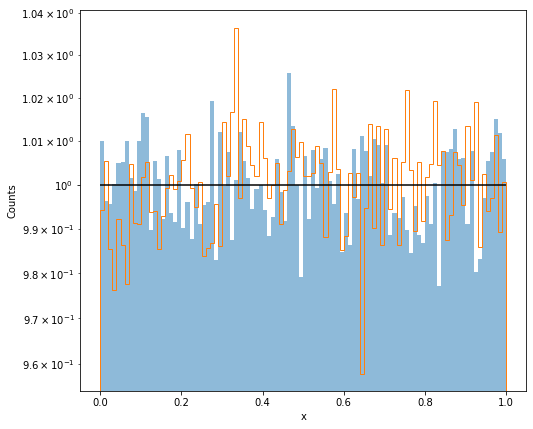

In [15]:
# Ejercicio 3.2 

z0 = 10
a = 1664525
b = 1013904223
m = 2*10**32

p = MLCG(z0,a,b,m,10**6)

#print(p[0:10])

np.random.seed(1000) # Fijar a este valor
p2 = np.random.uniform(0.,1.,10**6)

plt.figure(figsize=(8, 7))
plt.hist(p, bins=100, density=True, alpha=0.5)
plt.hist(p2, bins=100, density=True, histtype='step',linestyle='solid')
plt.hlines(1.,0.0,1.0)
plt.yscale("log")
plt.ylabel("Counts")
plt.xlabel("x")
plt.show()

**3.3 [1 punto]:** Para un histograma se pueden obtener los contenidos de cada bin usando

```
n, bins, patches = plt.hist(p, bins=100, density=True, alpha=0.5)
```

*n* será un array de 100 elementos que contiene el contenido en *y* de cada uno de los bines. Con esta información podemos calcular la suma de la diferencia absoluta para cada bin entre su contenido y lo esperado por una distribución uniforme (=1.0) para las dos distribuciones de números que has generado. Es decir:

$$
D = \sum_{i=0}^{100} |n_i-1.|
$$

Imprime por pantalla estas "distancias" evaluadas para tus dos distribuciones: $D_{MLCG}$ y $D_{np.random}$. La que tenga menor valor se aproximará más a la distribución uniforme... Puedes anular que se muestre una gráfica usando *plt.close()* en vez de *plt.show()*.

In [18]:
# Ejercicio 3.3

n1, bins1, patches1 = plt.hist(p, bins=100,range=[0,1],density=True, histtype='step',linestyle='solid')
print("D_MLCG = {:.3f}".format(np.sum(np.abs(n1-1.))))

n2, bins2, patches2 = plt.hist(p2,bins=100,range=[0,1],density=True, alpha=0.4)
print("D_np.random = {:.3f}".format(np.sum(np.abs(n2-1.))))
plt.close()

print("D_MLCG se aproxima mejor a la dist. uniforme.")

D_MLCG = 0.788
D_np.random = 0.864
D_MLCG se aproxima mejor a la dist. uniforme.
